In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import datetime
from math import floor
from sklearn.ensemble import RandomForestClassifier
import pickle
from shutil import copyfile
import matplotlib.pyplot as plt


In [ ]:
import sys
import os
import tkinter as tk
from tkinter import filedialog

# Get path of common model code and add it to the python path variable
curr_dir = !echo %cd% 

init_common_dir = curr_dir[0]
common_model_dir = filedialog.askdirectory(initialdir = init_common_dir,
                                         title = "Choose current the Common_Model_Code directory...")

sys.path.insert(0, common_model_dir)
from class_feature_selection import perform_feat_sel_models
from class_model_creation import model_data, perform_grid_search

In [3]:
import warnings
warnings.filterwarnings("ignore")


User input variables

In [4]:
base_path = 'C:\\AMA Sandbox\\Phone Disconnect Modeling\\'

jup_default_path = 'C:\\AMA Sandbox\\Jupyter Notebooks\\Phone Disconnect Model\\'

data_datetime_str = '20190725_011500'

Assign file path variables

In [33]:
model_base_name = 'Optimal_RF_Model'
jup_file_name = 'Create_PhoneDisconnect_RF_Model.ipynb'


Assign date and time to variable

In [6]:
current_time = datetime.datetime.now()
start_time_str = current_time.strftime("%Y%m%d_%I%M%S")

Assign model and data paths

In [7]:
data_path = base_path + 'Data\\'

if not os.path.exists(data_path):
    os.mkdir(data_path)
    
data_path = data_path + data_datetime_str + '_Model_Data\\'

if not os.path.exists(data_path):
    os.mkdir(data_path)

In [8]:
model_path = base_path + 'Model\\'

if not os.path.exists(model_path):
    os.mkdir(model_path)
    
model_res_path = model_path + start_time_str + '_' + model_base_name + '\\'

if not os.path.exists(model_res_path):
    os.mkdir(model_res_path)

Import Training Data

In [9]:
train_data_file = data_path + data_datetime_str + '_PhoneDisconnectModel_TrainData.csv'
train_target_file = data_path + data_datetime_str + '_PhoneDisconnectModel_TrainTarget.csv'

train_data = pd.read_csv(train_data_file, delimiter=",", index_col = 0, header = 0)
train_target = pd.read_csv(train_target_file, delimiter=",", index_col = 0, header = 0)

In [10]:
train_data.shape

(18360, 336)

In [11]:
train_target.shape

(18360, 1)

Import Testing Data

In [12]:
test_data_file = data_path + data_datetime_str + '_PhoneDisconnectModel_TestData.csv'
test_target_file = data_path + data_datetime_str + '_PhoneDisconnectModel_TestTarget.csv'

test_data = pd.read_csv(test_data_file, delimiter=",", index_col = 0, header = 0)
test_target = pd.read_csv(test_target_file, delimiter=",", index_col = 0, header = 0)

In [13]:
test_data.shape

(4590, 336)

In [14]:
test_target.shape

(4590, 1)

Check training and testing variables

In [15]:
num_rows = train_data.shape[0] + 1
num_cols = train_data.shape[1] + 1
pd.set_option('max_rows', num_rows)
pd.set_option('max_columns', num_cols)
np.set_printoptions(threshold=np.inf)

Assign variables needed for feature selection

In [16]:
score_thresh = 0.05
var_buffer_perc = 0.01
perc_vals = list(range(5, 105, 5))
thresh_vals = list(np.arange(0.1, 1.1, 0.1))
step_val = 0.1

num_features = train_data.shape[1]
num_feat_steps = 20
k_step_sz = num_features / num_feat_steps
k_max = num_features + k_step_sz
k_vals = list(np.arange(1, k_max, k_step_sz).astype('int'))

Assign variables needed for modeling

In [17]:
rand_st = 45
cv_num = 5
cv_scorers = {'accuracy': 'accuracy', 'roc_auc': 'roc_auc', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
metric_fcns = ['accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score', 'f1_score']
main_scorer = 'recall'


Assign variables needed for grid search

In [24]:
n_estimators = [10, 20, 50, 100]
max_depth = [3, 5]
min_samples_split = [3, 5, 10]
criterion = ['entropy', 'gini']
class_weight = ['balanced', 'balanced_subsample']

grid_params = {
    'criterion': criterion,
    'max_depth': max_depth,
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'class_weight': class_weight
}


Create base model object (all parameters specified are default values)

In [19]:
base_model = RandomForestClassifier(n_estimators = 100, max_depth = 3, 
                             min_samples_split = 3, criterion = 'entropy', 
                             random_state = rand_st, class_weight = 'balanced')


Create base model with all features

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.5204822709539245 +/- 0.03988612660228633
CV  test_f1 : 0.1717988715151984 +/- 0.0114839130378945
CV  test_precision : 0.09750618419890625 +/- 0.0073515604139015684
CV  test_recall : 0.7226394378568293 +/- 0.024009426076936884
CV  test_roc_auc : 0.6800780846651049 +/- 0.020390276092244124
CV Runtime: 4.740422248840332


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




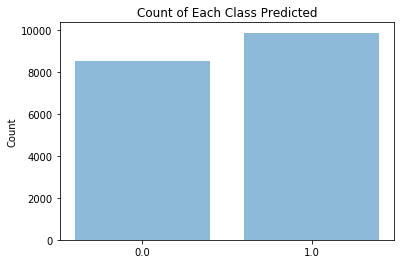

Number of 0 predictions: 8504
Number of 1 predictions: 9856
Percent of predictions with value 0: 0.4631808278867102
Percent of predictions with value 1: 0.5368191721132898


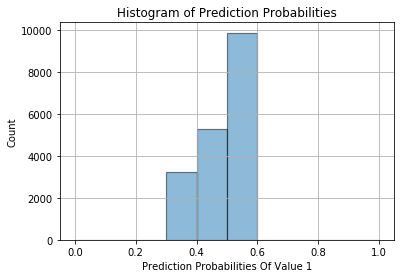



------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


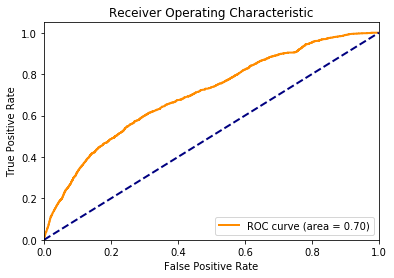



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.4977124183006536
f1_score : 0.1705342687533729
precision_score : 0.09618506493506493
recall_score : 0.751188589540412
roc_auc_score : 0.6150959908750135


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.48      0.64     17098
         1.0       0.10      0.75      0.17      1262

    accuracy                           0.50     18360
   macro avg       0.53      0.62      0.41     18360
weighted avg       0.90      0.50      0.61     18360



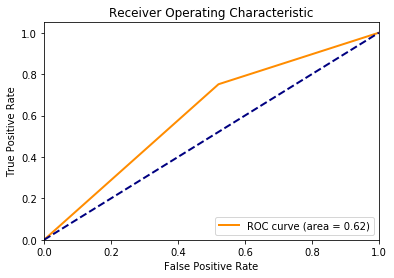

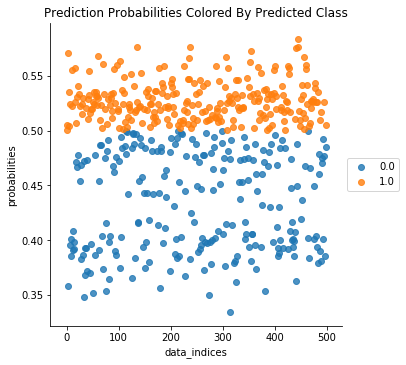

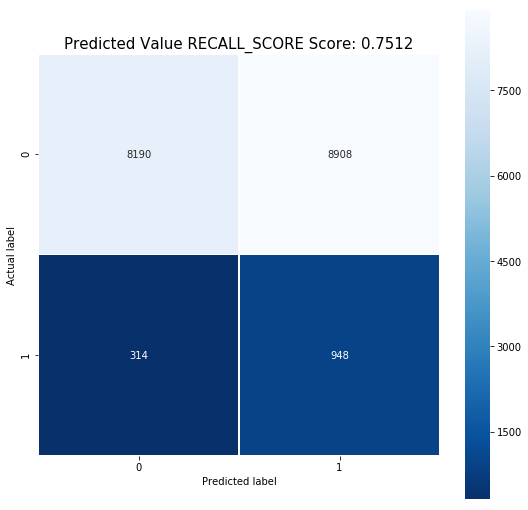



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


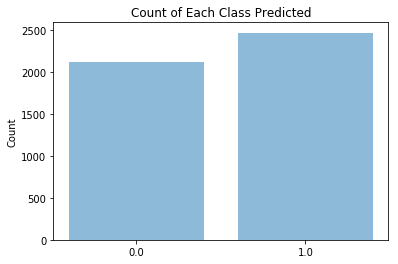

Number of 0 predictions: 2118
Number of 1 predictions: 2472
Percent of predictions with value 0: 0.46143790849673205
Percent of predictions with value 1: 0.538562091503268


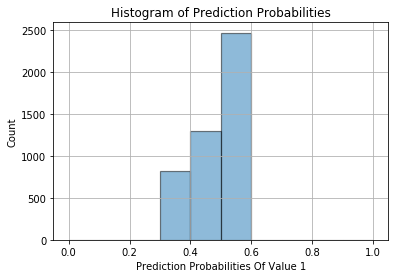



------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


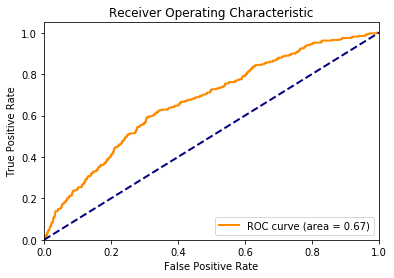



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.4934640522875817
f1_score : 0.1657696447793326
precision_score : 0.09344660194174757
recall_score : 0.7333333333333333
roc_auc_score : 0.6045614035087719


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

         0.0       0.96      0.48      0.64      4275
         1.0       0.09      0.73      0.17       315

    accuracy                           0.49      4590
   macro avg       0.53      0.60      0.40      4590
weighted avg       0.90      0.49      0.60      4590



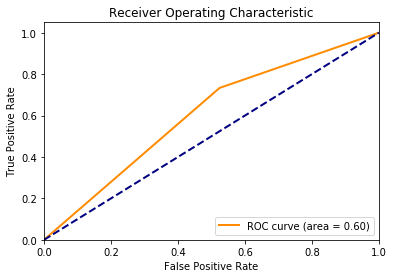

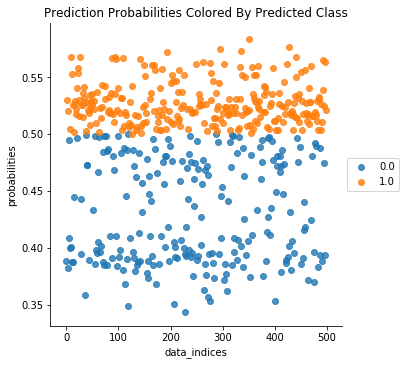

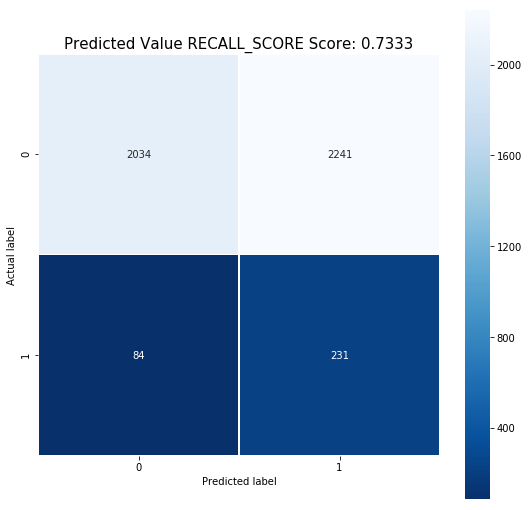

In [20]:
base_fit_model, base_pred_dict, base_score_dict = model_data(train_data, train_target, test_data, test_target, base_model,  
               cv_scorers, cv_num, metric_fcns, main_scorer)

Perform feature selection

-- Low Variance Filter Feature Selection --
Thresholds Selected: 0.1
Selected Model CV Mean  test_accuracy  Score: 0.5217931831748366
Selected Model CV  test_accuracy  Deviation: 0.06140093443828216
Selected Model CV Mean  test_f1  Score: 0.17319023356697288
Selected Model CV  test_f1  Deviation: 0.010887895563909261
Selected Model CV Mean  test_precision  Score: 0.09833750520867042
Selected Model CV  test_precision  Deviation: 0.0066603897892518315
Selected Model CV Mean  test_recall  Score: 0.7281416650981869
Selected Model CV  test_recall  Deviation: 0.08741614046169072
Selected Model CV Mean  test_roc_auc  Score: 0.6632398231592893
Selected Model CV  test_roc_auc  Deviation: 0.018786459377531997
Number of Original Features: 336
Number of Selected Features: 34
Selected Features:
['pcp', 'doctor_age_yrs', 'phone_age_yrs', 'yop_yrs', 'phone_src_3', 'phone_src_4', 'phone_src_8', 'phone_age_3', 'phone_age_4', 'phone_age_8', 'yop_3', 'yop_4', 'yop_8', 'ppd_address_type_1', 'ppd_address_t

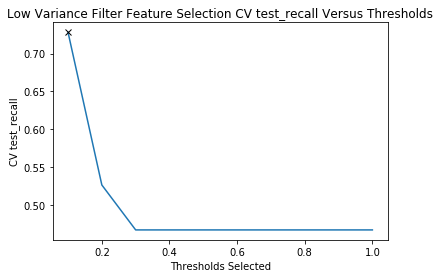



-- Model Wrapper Feature Selection --
Selected Model CV Mean  test_accuracy  Score: 0.5334441812973583
Selected Model CV  test_accuracy  Deviation: 0.025101442885979035
Selected Model CV Mean  test_f1  Score: 0.17638743121756476
Selected Model CV  test_f1  Deviation: 0.011125666921374315
Selected Model CV Mean  test_precision  Score: 0.10038573005961653
Selected Model CV  test_precision  Deviation: 0.0065772013393903764
Selected Model CV Mean  test_recall  Score: 0.7265857331074722
Selected Model CV  test_recall  Deviation: 0.04570191471363651
Selected Model CV Mean  test_roc_auc  Score: 0.6846588523393194
Selected Model CV  test_roc_auc  Deviation: 0.022884906709408022
Number of Original Features: 336
Number of Selected Features: 40
Selected Features:
['lic_state_match', 'doctor_age_yrs', 'phone_age_yrs', 'yop_yrs', 'phone_src_3', 'phone_src_4', 'phone_src_7', 'phone_src_8', 'phone_age_3', 'phone_age_4', 'phone_age_7', 'phone_age_8', 'yop_3', 'yop_4', 'yop_7', 'yop_8', 'ppd_address_

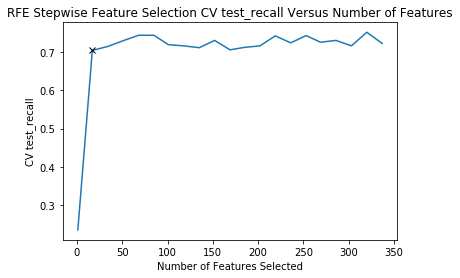



-- Univariate Chi-Sq Feature Selection --
Percent of Features Selected: 25
Selected Model CV Mean  test_accuracy  Score: 0.47924965500493394
Selected Model CV  test_accuracy  Deviation: 0.030139803060702183
Selected Model CV Mean  test_f1  Score: 0.16774971504516603
Selected Model CV  test_f1  Deviation: 0.008290261890161844
Selected Model CV Mean  test_precision  Score: 0.09424039681588806
Selected Model CV  test_precision  Deviation: 0.005123214223545303
Selected Model CV Mean  test_recall  Score: 0.763059163059163
Selected Model CV  test_recall  Deviation: 0.022703792719625613
Selected Model CV Mean  test_roc_auc  Score: 0.6819592659419418
Selected Model CV  test_roc_auc  Deviation: 0.019996637428669656
Number of Original Features: 336
Number of Selected Features: 84
Selected Features:
['doctor_age_yrs', 'phone_age_yrs', 'yop_yrs', 'phone_src_1', 'phone_src_2', 'phone_src_3', 'phone_src_4', 'phone_src_7', 'phone_src_8', 'phone_age_1', 'phone_age_2', 'phone_age_3', 'phone_age_4', '

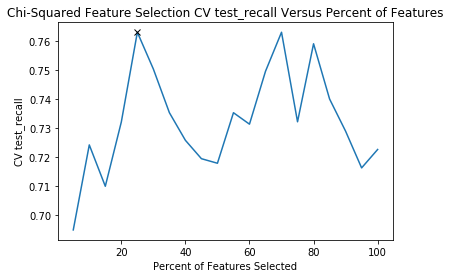



-- Mutual Information Feature Selection --
Percent of Features Selected: 10
Selected Model CV Mean  test_accuracy  Score: 0.37728505277875646
Selected Model CV  test_accuracy  Deviation: 0.02836778990981912
Selected Model CV Mean  test_f1  Score: 0.1563623215821869
Selected Model CV  test_f1  Deviation: 0.007176337990764993
Selected Model CV Mean  test_precision  Score: 0.08621746871764527
Selected Model CV  test_precision  Deviation: 0.004311061274427917
Selected Model CV Mean  test_recall  Score: 0.8391429826212435
Selected Model CV  test_recall  Deviation: 0.010800230933037891
Selected Model CV Mean  test_roc_auc  Score: 0.6613871938321318
Selected Model CV  test_roc_auc  Deviation: 0.02466648439038994
Number of Original Features: 336
Number of Selected Features: 34
Selected Features:
['lic_state_match', 'polo_ind', 'phone_age_yrs', 'phone_src_3', 'phone_src_4', 'phone_age_2', 'phone_age_3', 'phone_age_4', 'yop_4', 'yop_7', 'ppd_region_1', 'ppd_division_7', 'ppd_group_6', 'ppd_msa

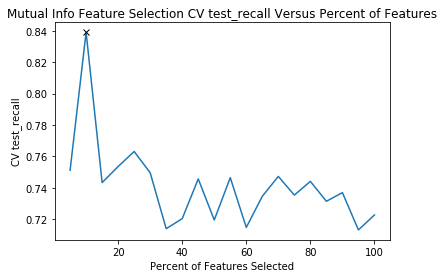



-- Anova F Statistic Feature Selection --
Percent of Features Selected: 15
Selected Model CV Mean  test_accuracy  Score: 0.5206976880570772
Selected Model CV  test_accuracy  Deviation: 0.008946270948631834
Selected Model CV Mean  test_f1  Score: 0.17369113154165836
Selected Model CV  test_f1  Deviation: 0.009084999470545686
Selected Model CV Mean  test_precision  Score: 0.09852010991290014
Selected Model CV  test_precision  Deviation: 0.005072659613770436
Selected Model CV Mean  test_recall  Score: 0.7329380764163373
Selected Model CV  test_recall  Deviation: 0.04443221109796939
Selected Model CV Mean  test_roc_auc  Score: 0.6809670568667199
Selected Model CV  test_roc_auc  Deviation: 0.0213959022027247
Number of Original Features: 336
Number of Selected Features: 51
Selected Features:
['lic_state_match', 'doctor_age_yrs', 'yop_yrs', 'phone_src_3', 'phone_src_4', 'phone_src_7', 'phone_src_8', 'phone_age_3', 'phone_age_4', 'phone_age_7', 'phone_age_8', 'yop_3', 'yop_4', 'yop_7', 'yop_

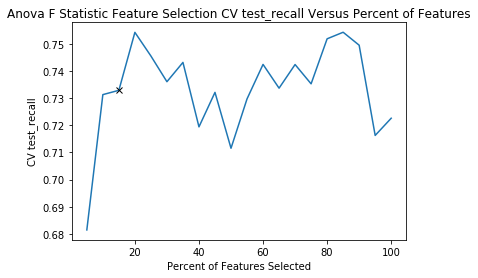



Scores Per Feature Selection Type:
  fs_type  opt_score  num_vars
0     lvf   0.728142        34
0    wrap   0.726586        40
0    step   0.704420        17
0   chisq   0.763059        84
0  mutinf   0.839143        34
0  anovaf   0.732938        51


Optimal Feature Selection Choice Based On  recall :
FS Type:  mutinf
FS Score:  0.8391429826212435




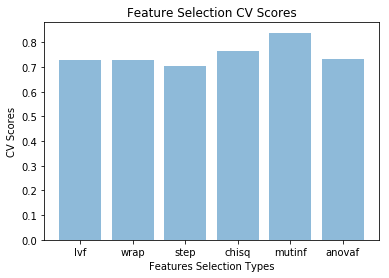

In [21]:
results_dict, opt_fs_dict, all_scores_df = perform_feat_sel_models(train_data, train_target, test_data, 
                            base_model, perc_vals, k_vals, thresh_vals, 
                            cv_num, cv_scorers, main_scorer, score_thresh, var_buffer_perc, step_val)

Extract feature selection training and testing datasets

In [22]:
fs_train_data = opt_fs_dict['train_data']
fs_test_data = opt_fs_dict['test_data']

Create model object for grid search optimization

In [23]:
grid_model = RandomForestClassifier(random_state = rand_st)


Perform grid search on chosen feature selection dataset

In [25]:
opt_model = perform_grid_search(grid_model, fs_train_data, train_target, grid_params, main_scorer, cv_num)

*** Grid Search ***
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  2.0min finished


Grid Search Runtime: 122.0098865032196


Grid Search Optimal Parameters: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 50}
Grid Search Optimal Parameter Score: 0.8518057559724228


Optimal Model Parameter Settings:
RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=None, oob_score=False,
                       random_state=45, verbose=0, warm_start=False)




Evaluate performance of optimal model chosen

*****************************************************************************************
************************* Training Set Cross-Validation Results *************************
*****************************************************************************************


CV  test_accuracy : 0.3662846979523609 +/- 0.009143220070541804
CV  test_f1 : 0.1559664655198807 +/- 0.005616574543509245
CV  test_precision : 0.08584257620498023 +/- 0.0031195183448793516
CV  test_recall : 0.8518037518037518 +/- 0.030244414433806332
CV  test_roc_auc : 0.6614914213941964 +/- 0.026192172725422482
CV Runtime: 2.3258187770843506


*****************************************************************************************
******************************* Full Training Set Results *******************************
*****************************************************************************************




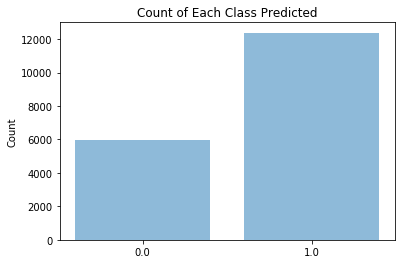

Number of 0 predictions: 5977
Number of 1 predictions: 12383
Percent of predictions with value 0: 0.3255446623093682
Percent of predictions with value 1: 0.6744553376906318


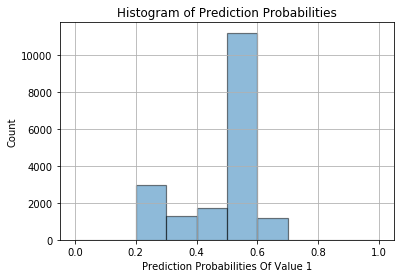



------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


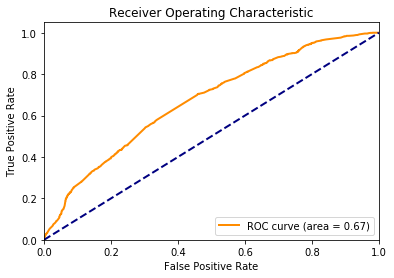



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.3741285403050109
f1_score : 0.1578600219860755
precision_score : 0.08697407736412824
recall_score : 0.8534072900158478
roc_auc_score : 0.5960801802752067


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.34      0.50     17098
         1.0       0.09      0.85      0.16      1262

    accuracy                           0.37     18360
   macro avg       0.53      0.60      0.33     18360
weighted avg       0.91      0.37      0.48     18360



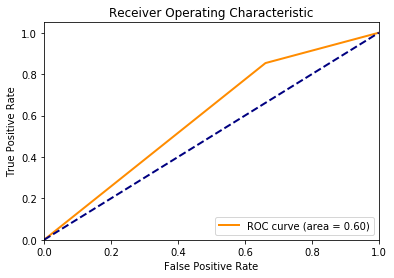

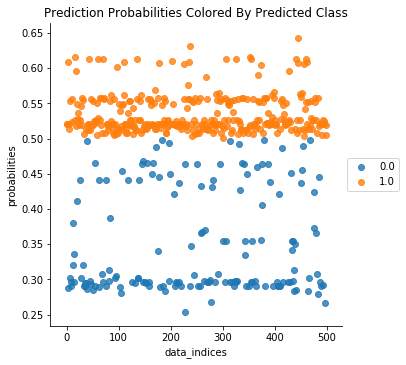

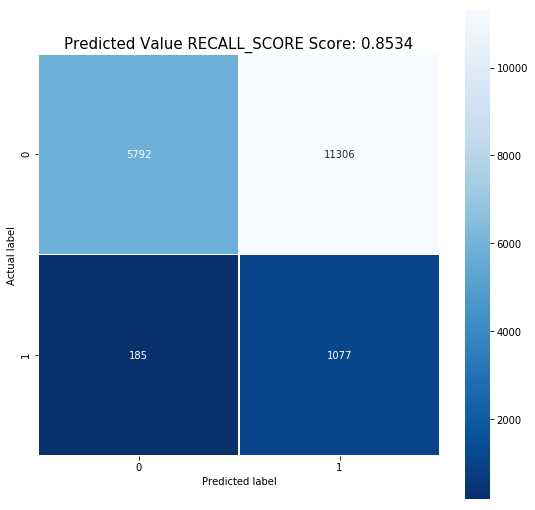



*****************************************************************************************
********************************** Testing Set Results **********************************
*****************************************************************************************


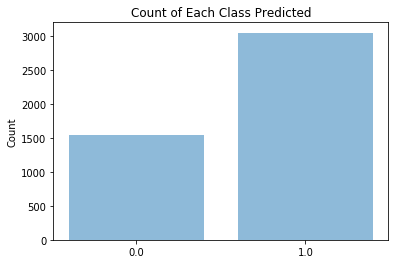

Number of 0 predictions: 1538
Number of 1 predictions: 3052
Percent of predictions with value 0: 0.33507625272331154
Percent of predictions with value 1: 0.6649237472766885


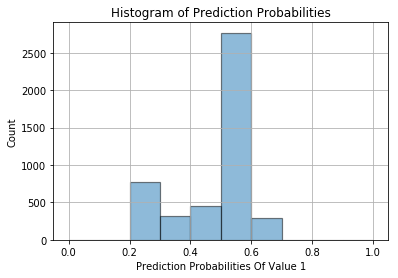



------------------------------------------------------------
--- All Possible Class Threshold Probabilities ROC Curve ---
------------------------------------------------------------


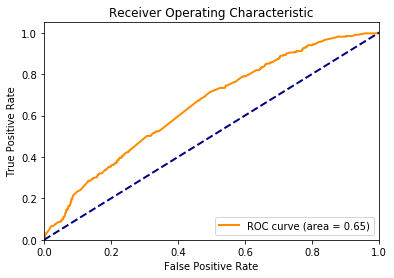



---------------------------------------
--- Actual Class Prediction Results ---
---------------------------------------


Model Prediction Scores
-----------------------
accuracy_score : 0.3810457516339869
f1_score : 0.1562221562221562
precision_score : 0.08617300131061599
recall_score : 0.834920634920635
roc_auc_score : 0.5912614870509608


Model Prediction Classificaton Table
------------------------------------
              precision    recall  f1-score   support

         0.0       0.97      0.35      0.51      4275
         1.0       0.09      0.83      0.16       315

    accuracy                           0.38      4590
   macro avg       0.53      0.59      0.33      4590
weighted avg       0.91      0.38      0.49      4590



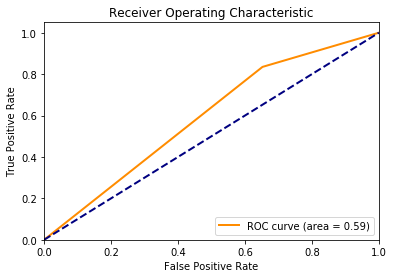

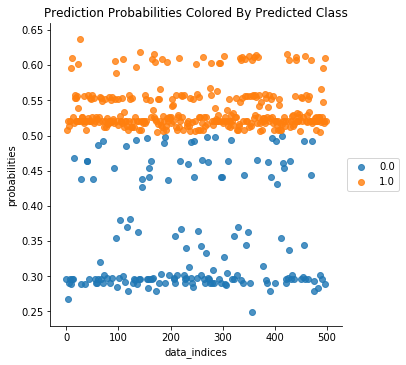

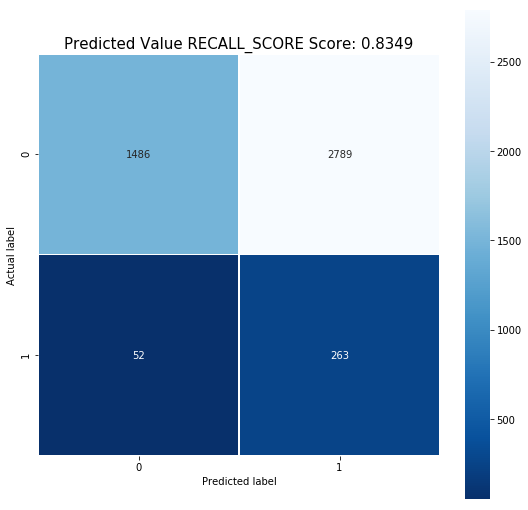

In [26]:
opt_fit_model, opt_pred_dict, opt_score_dict = model_data(fs_train_data, train_target, fs_test_data, test_target, opt_model,
               cv_scorers, cv_num, metric_fcns, main_scorer)

View model feature importance values

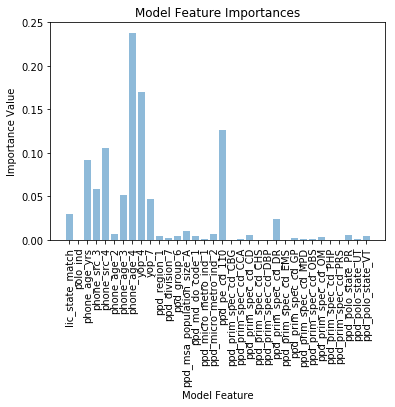

                           Importance
lic_state_match              0.029172
polo_ind                     0.000000
phone_age_yrs                0.091156
phone_src_3                  0.058199
phone_src_4                  0.104747
phone_age_2                  0.006138
phone_age_3                  0.051712
phone_age_4                  0.237893
yop_4                        0.169922
yop_7                        0.046961
ppd_region_1                 0.004326
ppd_division_7               0.002030
ppd_group_6                  0.003846
ppd_msa_population_size_A    0.009705
ppd_md_do_code_1             0.003922
ppd_micro_metro_ind_1        0.001104
ppd_micro_metro_ind_2        0.006342
ppd_pe_cd_110                0.125861
ppd_prim_spec_cd_CBG         0.000000
ppd_prim_spec_cd_CCA         0.000474
ppd_prim_spec_cd_CD          0.005476
ppd_prim_spec_cd_CHS         0.000015
ppd_prim_spec_cd_DBP         0.000025
ppd_prim_spec_cd_DR          0.023871
ppd_prim_spec_cd_EMS         0.000000
ppd_prim_spe

In [27]:
fit_cols = fs_train_data.columns.values

importance = opt_fit_model.feature_importances_
importance_df = pd.DataFrame(importance, index = fs_train_data.columns, 
                          columns = ['Importance'])
plt.bar(list(fit_cols), importance.tolist(), align = 'center', alpha = 0.5)
plt.xticks(rotation = 90)
plt.ylabel('Importance Value') 
plt.xlabel('Model Feature')
plt.title('Model Feature Importances')
plt.show()

print(importance_df)


Save model for future use

In [28]:
model_filename = model_path + start_time_str + '_' + model_base_name + '.sav'
pickle.dump(opt_fit_model, open(model_filename, 'wb'))

Save list of features used

In [29]:
var_filename = model_path + start_time_str + '_' + model_base_name + '_FeatureList.sav'
pickle.dump(fit_cols, open(var_filename, 'wb'))

Save Results

In [30]:
pred_filename = model_res_path + start_time_str + '_' + model_base_name + '_Preds.sav'
pickle.dump(opt_pred_dict, open(pred_filename, 'wb'))

In [31]:
scores_filename = model_res_path + start_time_str + '_' + model_base_name + '_Scores.sav'
pickle.dump(opt_score_dict, open(scores_filename, 'wb'))

In [34]:
for i in range(3):
    jup_html_cmd = 'jupyter nbconvert --to html ' + jup_file_name
    os.system(jup_html_cmd)

    dot_ndx = jup_file_name.find('.ipynb')
    html_def_name = jup_default_path + jup_file_name[:dot_ndx] + '.html'
    res_html_name = model_res_path + start_time_str + '_' + jup_file_name[:dot_ndx] + '.html'

    copyfile(html_def_name, res_html_name)
    os.remove(html_def_name)

In [35]:
end_time = datetime.datetime.now()
elapsed_time = end_time - current_time
print('Elapsed time (sec): {}'.format(elapsed_time))
print('Elapsed time (min): {}'.format((elapsed_time / 60)))
print('Elapsed time (hrs): {}'.format(((elapsed_time / 60) / 60)))

Elapsed time (sec): 0:35:17.117450
Elapsed time (min): 0:00:35.285291
Elapsed time (hrs): 0:00:00.588088
